In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../data/logisticRegression.csv')

In [5]:
print(df)

   0.5  1.5  0
0  1.0  1.0  0
1  1.5  0.5  0
2  3.0  0.5  1
3  2.0  2.0  1
4  1.0  2.5  1


In [6]:
x = []
y = []
for i in range(df.shape[0]):
    temp = df.iloc[i]
    x.append(temp[0:-1])
    y.append(temp[-1])

In [8]:
x_values = np.array(x)
y_values = np.array(y)

* Logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

In [56]:
def calculate_gradient_descent(x_values, y_values, w_values, b): 
    m,n = x_values.shape # tuple (m,n)
    derivatives_w = np.zeros(n)                         
    derivative_b = 0

    for i in range(m):
        f_i = sigmoid(np.dot(x_values[i],w_values) + b)          
        error_i  = f_i  - y_values[i]                      
        for j in range(n):
            derivatives_w[j] = derivatives_w[j] + error_i * x_values[i,j]     
        derivative_b = derivative_b + error_i
                                
        
    return derivative_b/m, derivatives_w/m  

In [57]:
def sigmoid(z):
    value = 1/(1+np.exp(-z))
    return value


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ : cost for a single data point.

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
* m: training examples
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [65]:
def calculate_cost(x_values, y_values, w_values, b):

    m = x_values.shape[0]
    total_cost = 0.0
    for i in range(m):
        f_i = sigmoid(np.dot(x_values[i],w_values) + b)
        total_cost +=  -y_values[i]*np.log(f_i) - (1-y_values[i])*np.log(1-f_i)
    return total_cost/m

In [81]:
import copy 

def gradient_descent(x_values, y_values, w_initial, b_initial, alpha, iterations): 
    cost_cache = []
    w = copy.deepcopy(w_initial)  
    b = b_initial
    
    for i in range(iterations):
        derivative_b, derivatives_w = calculate_gradient_descent(x_values, y_values, w, b)   

       #simultaneous update
        w = w - alpha * derivatives_w               
        b = b - alpha * derivative_b     

        if i<100000:      
            cost_cache.append(calculate_cost(x_values, y_values, w, b))
    return w, b, cost_cache

In [118]:
w_initial_values  = np.zeros(x_values.shape[1])
b_initial  = 0
learning_rate = 0.1
iterations = 10000


In [120]:
w_final, b_final, cost_cache = gradient_descent(x_values, y_values, w_initial_values, b_initial, learning_rate, iterations) 

In [121]:
print(w_final, b_final)

[5.09255896 5.23631964] -13.917026239040428


In [138]:
def predict(x_values, w_values, b): 
    m, n = x_values.shape   
    predictions = np.zeros(m)
    for i in range(m):
        f_i = sigmoid(np.dot(x_values[i],w_values) + b)
        predictions[i] = f_i >= 0.5
    return predictions

print("Predictions:",predict(x_values,w_final,b_final))
print("Actual:", y_values)

Predictions: [0. 0. 1. 1. 1.]
Actual: [0. 0. 1. 1. 1.]


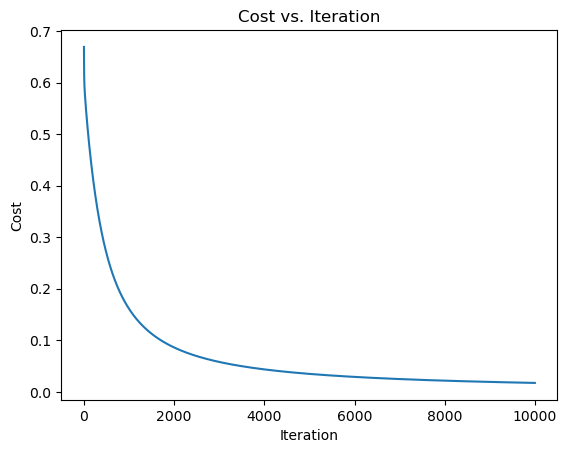

In [122]:
#NOTE: I looked at the Cost Vs Iteration graph and kept changing the learning rate best fit for my data


import matplotlib.pyplot as plt
plt.figure()
plt.plot(cost_cache)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()


In [124]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_values, y_values)

LogisticRegression()

In [126]:
print("Accuracy:", lr_model.score(x_values, y_values))

Accuracy: 1.0


In [127]:
y_pred = lr_model.predict(x_values)

print("Prediction:", y_pred)
print("Acutal:",y_values)

Prediction: [0. 0. 1. 1. 1.]
Acutal: [0. 0. 1. 1. 1.]


In [128]:
#normalized#

print("Weights (Coefficients):", lr_model.coef_)
print("Intercept (Bias):", lr_model.intercept_)



Weights (Coefficients): [[0.67681174 0.73903629]]
Intercept (Bias): [-1.67353142]
